# **ETL**

## Objectives

* Load both datasets 
* Basic EDA (describing dataset)
* Cleaning the dataset i.e. deal with missing, duplicated, inconsistent or invalid values
* Convert data into its correct type
* Engineer features to improve interpretability and model performance.
* Save cleaned dataset as a new dataset to be used in future notebooks

## Inputs

* tmdb_5000_credits.csv
* tmsb_5000_movies.csv
* Panda, Numpy

## Outputs

**Engineered features:**
- Has_homepage   
- Has_overview 
- Has_tagline  
- ROI      
- Log_budget     
- Log_revenue  
- Decade        
- Runtime_bucket  
- Gemre
- Languages
- cast
- Crew


Raw file:
- merged_df.csv

- Processed file (for EDA and Modelling):
     - movie_features.csv
     - movies_ready_for-EDA.csv

 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\HACK_2\\Team1_TMDb_Hackathon_2\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\HACK_2\\Team1_TMDb_Hackathon_2'

# Section 1: Basic EDA

We will load the libraries and also load the both datasets:

In [4]:
import pandas as pd
import numpy as np
from pathlib import Path


# load the datasets
movies_df = pd.read_csv('Data/RAW/tmdb_5000_movies.csv')
credits_df = pd.read_csv('Data/RAW/tmdb_5000_credits.csv')


In [5]:
print(movies_df.shape)
print(credits_df.shape)

(4803, 20)
(4803, 4)


In [6]:
print(movies_df.head())
print(credits_df.head())

      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

View if there are any missing values within the datasets:

In [7]:
# missing values
print(movies_df.isna().sum().sort_values(ascending=False))
print(credits_df.isna().sum().sort_values(ascending=False))


homepage                3091
tagline                  844
overview                   3
runtime                    2
release_date               1
budget                     0
vote_average               0
title                      0
status                     0
spoken_languages           0
revenue                    0
production_countries       0
genres                     0
production_companies       0
popularity                 0
original_title             0
original_language          0
keywords                   0
id                         0
vote_count                 0
dtype: int64
movie_id    0
title       0
cast        0
crew        0
dtype: int64


Checking data types of both datasets to ensure they are correct:

In [8]:
print(movies_df.dtypes)
print(credits_df.dtypes)

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object
movie_id     int64
title       object
cast        object
crew        object
dtype: object


We will check a brief overview of what the data is like and check if anything catches our eye:

In [9]:
# Loading first 5 rows of movies_df

movies_df.describe(include='all')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
count,4.803000e+03,4803,1712,4803.000000,4803,4803,4803,4800,4803.000000,4803,4803,4802,4.803000e+03,4801.000000,4803,4803,3959,4803,4803.000000,4803.000000
unique,NaN,1175,1691,NaN,4222,37,4801,4800,NaN,3697,469,3280,NaN,NaN,544,3,3944,4800,NaN,NaN
top,NaN,"[{""id"": 18, ""name"": ""Drama""}]",http://www.missionimpossible.com/,NaN,[],en,Out of the Blue,"In the 22nd century, a paraplegic Marine is di...",NaN,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,NaN,NaN,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,The Host,NaN,NaN
freq,NaN,370,4,NaN,412,4505,2,1,NaN,351,2977,10,NaN,NaN,3171,4795,3,2,NaN,NaN
mean,2.904504e+07,NaN,NaN,57165.484281,NaN,NaN,NaN,NaN,21.492301,NaN,NaN,NaN,8.226064e+07,106.875859,NaN,NaN,NaN,NaN,6.092172,690.217989
std,4.072239e+07,NaN,NaN,88694.614033,NaN,NaN,NaN,NaN,31.816650,NaN,NaN,NaN,1.628571e+08,22.611935,NaN,NaN,NaN,NaN,1.194612,1234.585891
min,0.000000e+00,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,7.900000e+05,NaN,NaN,9014.500000,NaN,NaN,NaN,NaN,4.668070,NaN,NaN,NaN,0.000000e+00,94.000000,NaN,NaN,NaN,NaN,5.600000,54.000000
50%,1.500000e+07,NaN,NaN,14629.000000,NaN,NaN,NaN,NaN,12.921594,NaN,NaN,NaN,1.917000e+07,103.000000,NaN,NaN,NaN,NaN,6.200000,235.000000
75%,4.000000e+07,NaN,NaN,58610.500000,NaN,NaN,NaN,NaN,28.313505,NaN,NaN,NaN,9.291719e+07,118.000000,NaN,NaN,NaN,NaN,6.800000,737.000000


In [10]:
# Extra checks for duplicates and unique IDs
print("Full Dupe check movies_df:", movies_df.duplicated().sum())
print("Full Dupe check credits_df:", credits_df.duplicated().sum())

Full Dupe check movies_df: 0
Full Dupe check credits_df: 0


Checking if every movie has its own unique ID:

In [11]:
# Unqique IDs in both datasets
print(f"Unique movie IDs in movies_df:", movies_df['id'].is_unique)
print(f"Unique credit IDs in credits_df:", credits_df['movie_id'].is_unique)    


Unique movie IDs in movies_df: True
Unique credit IDs in credits_df: True


# Section 2: Cleaning the Data:

We will now begin filling the missing data seen above. The first missing value we will focus on is runtime and the method we will use to fill the null values is "median".

In [12]:
movies_df["runtime"] = movies_df["runtime"].fillna(movies_df["runtime"].median())

# check runtime missing values
movies_df['runtime'].isna().sum()

0

We can now see that there are no missing values in the 'runtime' column.

Next, we can focus on filling multiple columns together ('homepage', 'tagline', 'overview') which all have missing values. The reason they  can be done together is that the thing they all have in common are strings so we can apply the same process to all of them which is filling them with a null string.

In [13]:
# fill home, tagline and overview missing values with null string
for col in ['homepage', 'tagline', 'overview']:
    movies_df[col] = movies_df[col].fillna('')
movies_df.isna().sum().sort_values(ascending=False)

release_date            1
budget                  0
genres                  0
vote_average            0
title                   0
tagline                 0
status                  0
spoken_languages        0
runtime                 0
revenue                 0
production_countries    0
production_companies    0
popularity              0
overview                0
original_title          0
original_language       0
keywords                0
id                      0
homepage                0
vote_count              0
dtype: int64

We can now see that the only missing value is runtime so that will be our next focus.

Before filling the missing value we want to convert the 'release_data' column into the correct data type.

In [14]:
# make sure release_date is in datetime format
movies_df["release_date"] = pd.to_datetime(movies_df["release_date"], errors="coerce")

In [15]:
# mark which row have a valid release date
movies_df["has_release_date"] = movies_df["release_date"].notna()
movies_df["has_release_date"].value_counts()

has_release_date
True     4802
False       1
Name: count, dtype: int64

We will now create the minimum and maximum dates for this column.

In [16]:
# Place holder fill for release date missing values
movies_df["release_date"] = movies_df["release_date"].fillna(pd.Timestamp("1900-01-01"))

In [17]:
# check the range of release dates
movies_df["release_date"].min(), movies_df["release_date"].max()


(Timestamp('1900-01-01 00:00:00'), Timestamp('2017-02-03 00:00:00'))

For future ease of use we will just create a 'release_year' column which will be useful in showing visualisations.

In [18]:
# create a release year column for ease of analysis
movies_df["release_year"] = movies_df["release_date"].dt.year

Finally we will check if the missing value is filled.

In [19]:
# check no missing values in release_date after placeholder fill
movies_df["release_date"].isna().sum()

0

We have confirm that it is filled which means our dataset should no longer have missing values:

In [20]:
movies_df.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
has_release_date        0
release_year            0
dtype: int64

In [21]:
# check which rows have the placeholder date
movies_df.loc[movies_df["release_date"] == "1900-01-01", ["id","title","release_date"]]

,id,title,release_date
4553,380097,America Is Still the Place,1900-01-01


Now we will work on the second dataset:

In [22]:
# describe all for credits_df
credits_df.describe(include='all')

,movie_id,title,cast,crew
count,4803.000000,4803,4803,4803
unique,NaN,4800,4761,4776
top,NaN,The Host,[],[]
freq,NaN,2,43,28
mean,57165.484281,NaN,NaN,NaN
std,88694.614033,NaN,NaN,NaN
min,5.000000,NaN,NaN,NaN
25%,9014.500000,NaN,NaN,NaN
50%,14629.000000,NaN,NaN,NaN
75%,58610.500000,NaN,NaN,NaN


We want to check that this dataset matches the other and includes the same movies.

In [23]:
# Check if all movie IDs in credits are also in movies
all_ids_match = credits_df['movie_id'].isin(movies_df['id'])
print("All movie IDs in credits are in movies:", all_ids_match.all())


All movie IDs in credits are in movies: True


Since they match we are now able to merge both datasets into one main dataset which will be called "merged_df".

In [24]:
# merge the the two datset on the Movie ID columns
merged_df = movies_df.merge(credits_df, left_on='id', right_on='movie_id', how='left', validate='one_to_one').copy()

# print the shape of the merged dataframe
print("Shape of merged dataframe:", merged_df.shape)
# print missing values after merge
print("Missing values after merge:\n", merged_df.isna().sum().sort_values(ascending=False))

# print first 5 rows transposed for better readability
merged_df.head()


Shape of merged dataframe: (4803, 26)
Missing values after merge:
 budget                  0
genres                  0
cast                    0
title_y                 0
movie_id                0
release_year            0
has_release_date        0
vote_count              0
vote_average            0
title_x                 0
tagline                 0
status                  0
spoken_languages        0
runtime                 0
revenue                 0
release_date            0
production_countries    0
production_companies    0
popularity              0
overview                0
original_title          0
original_language       0
keywords                0
id                      0
homepage                0
crew                    0
dtype: int64


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title_x,vote_average,vote_count,has_release_date,release_year,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Enter the World of Pandora.,Avatar,7.2,11800,True,2009,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,True,2007,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,A Plan No One Escapes,Spectre,6.3,4466,True,2015,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,The Legend Ends,The Dark Knight Rises,7.6,9106,True,2012,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"Lost in our world, found in another.",John Carter,6.1,2124,True,2012,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


---

Now we want to validate a few things. Is there are any missing movie id's after the merge? Are there any duplicates? And has the dataset correctly merged?

In [25]:
# Check that every merged row has its movie_id filled
print("Any missing movie_id after merge?", merged_df["movie_id"].isna().sum())

# Double-check duplicates
print("Duplicate IDs in merged_df:", merged_df["id"].duplicated().sum())

# Confirm column names and count
print("Columns in merged_df:", merged_df.columns.tolist())
print("Merged shape:", merged_df.shape)

Any missing movie_id after merge? 0
Duplicate IDs in merged_df: 0
Columns in merged_df: ['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average', 'vote_count', 'has_release_date', 'release_year', 'movie_id', 'title_y', 'cast', 'crew']
Merged shape: (4803, 26)


Everything seems correct so we can move onto some other checks.

In [26]:
# Range Validation
print("Release year range:", merged_df["release_year"].min(), "to", merged_df["release_year"].max())

Release year range: 1900 to 2017


We noticed that 'title_x' and 'title_y' column look the same so we want to validate that assumption and if true, we will drop one of these columns.

In [27]:
# two titles now check they match
title_match = (merged_df["title_x"] == merged_df["title_y"])
print("All titles match between original_title and title_y:", title_match.all)

All titles match between original_title and title_y: <bound method Series.all of 0       True
1       True
2       True
3       True
4       True
        ... 
4798    True
4799    True
4800    True
4801    True
4802    True
Length: 4803, dtype: bool>


We will check the same case for 'id' and 'movie_id'

In [28]:
# Two ids now check they match
id_match = (merged_df["id"] == merged_df["movie_id"])
print("All IDs match between id and movie_id:", id_match.all)

All IDs match between id and movie_id: <bound method Series.all of 0       True
1       True
2       True
3       True
4       True
        ... 
4798    True
4799    True
4800    True
4801    True
4802    True
Length: 4803, dtype: bool>


As expected they were duplicate columns so it is safe to drop the redundant columns:

In [29]:
# Drop redundant columns
merged_df = merged_df.drop(columns=['movie_id'])

merged_df.head()



,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title_x,vote_average,vote_count,has_release_date,release_year,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,True,2009,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,True,2007,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Released,A Plan No One Escapes,Spectre,6.3,4466,True,2015,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,True,2012,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,True,2012,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [30]:
# Drop redundant columns
merged_df = merged_df.drop(columns=['title_y'])

merged_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,has_release_date,release_year,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,True,2009,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,True,2007,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,True,2015,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,True,2012,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,True,2012,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Next we wanto to see if 'title_x' is the same as 'original_title' and if they are we will once again drop the redundant column.

In [31]:
# Two ids now check they match
id_match = (merged_df["title_x"] == merged_df["original_title"])
print("All IDs match between title_x and original_title:", id_match.all())

All IDs match between title_x and original_title: False


They do not match so we will keep both as they may have their own useful data we can use in the future.

We will now do some validations and checks overall:

In [32]:
# check duplicates after merge
merged_df.duplicated().sum()

0

In [33]:
# confirm column names and count
merged_df.columns.tolist(), len(merged_df.columns)

(['budget',
  'genres',
  'homepage',
  'id',
  'keywords',
  'original_language',
  'original_title',
  'overview',
  'popularity',
  'production_companies',
  'production_countries',
  'release_date',
  'revenue',
  'runtime',
  'spoken_languages',
  'status',
  'tagline',
  'title_x',
  'vote_average',
  'vote_count',
  'has_release_date',
  'release_year',
  'cast',
  'crew'],
 24)

In [34]:
# check missing values after all cleaning
merged_df.isna().sum().sort_values(ascending=False) # Check for any remaining missing values

budget                  0
genres                  0
cast                    0
release_year            0
has_release_date        0
vote_count              0
vote_average            0
title_x                 0
tagline                 0
status                  0
spoken_languages        0
runtime                 0
revenue                 0
release_date            0
production_countries    0
production_companies    0
popularity              0
overview                0
original_title          0
original_language       0
keywords                0
id                      0
homepage                0
crew                    0
dtype: int64

In [35]:
# checked data types
merged_df.dtypes

budget                           int64
genres                          object
homepage                        object
id                               int64
keywords                        object
original_language               object
original_title                  object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
tagline                         object
title_x                         object
vote_average                   float64
vote_count                       int64
has_release_date                  bool
release_year                     int32
cast                            object
crew                            object
dtype: object

Eveything is cleaned and the data types are all correct.

In [36]:
# Capitalize column names for consistency
merged_df.columns = [col.capitalize() for col in merged_df.columns] 

We want to validate anything that may seem unrealistic such as budget/revenue being 0, runtime having extreme outliers, or that all values within the vote average are between 0-10 etc.

First we will check the budget/revenue:

In [37]:
df_zero_budget = merged_df[merged_df['Budget'] == 0]
print(f"Movies with budget = 0: {len(df_zero_budget)}")
df_zero_budget[['Title_x', 'Budget', 'Release_date']].head(10)

Movies with budget = 0: 1037


,Title_x,Budget,Release_date
265,The Cat in the Hat,0,2003-11-21
321,The Campaign,0,2012-08-09
359,Alvin and the Chipmunks: The Road Chip,0,2015-12-17
406,Arthur Christmas,0,2011-02-22
409,All That Jazz,0,1979-12-20
453,The Pink Panther,0,2006-01-18
463,Déjà Vu,0,1998-04-22
474,Evolution,0,2015-09-14
475,The Edge,0,1997-09-06
489,Oceans,0,2009-10-17


In [38]:
df_zero_revenue = merged_df[merged_df['Revenue'] == 0]
print(f"Movies with revenue = 0: {len(df_zero_revenue)}")
df_zero_revenue[['Title_x' , 'Revenue', 'Release_date']].head(10)


Movies with revenue = 0: 1427


,Title_x,Revenue,Release_date
83,The Lovers,0,2015-02-13
135,The Wolfman,0,2010-02-11
265,The Cat in the Hat,0,2003-11-21
309,Son of the Mask,0,2005-02-18
376,Volcano,0,1997-04-25
406,Arthur Christmas,0,2011-02-22
433,RED 2,0,2013-07-18
453,The Pink Panther,0,2006-01-18
463,Déjà Vu,0,1998-04-22
467,Mighty Joe Young,0,1998-12-25


There seems to be a large amount of movies without a 'Budget' OR 'Revenue'. These are most likely null values however we can try to fill them. Although movies without 'Budget' AND 'Revenue' are rows that may need to be dropped due to not having enough data.

In [39]:
df_zero_both = merged_df[(merged_df['Budget'] == 0) & (merged_df['Revenue'] == 0)]
print(f"Movies with both budget and revenue = 0: {len(df_zero_both)}")
df_zero_both[['Title_x', 'Budget', 'Revenue', 'Release_date']].head(10)

Movies with both budget and revenue = 0: 890


,Title_x,Budget,Revenue,Release_date
265,The Cat in the Hat,0,0,2003-11-21
406,Arthur Christmas,0,0,2011-02-22
453,The Pink Panther,0,0,2006-01-18
463,Déjà Vu,0,0,1998-04-22
474,Evolution,0,0,2015-09-14
584,Wolf,0,0,1994-06-17
601,Rollerball,0,0,2002-02-08
721,Kangaroo Jack,0,0,2003-01-17
735,The Tuxedo,0,0,2002-09-27
745,Miss Congeniality 2: Armed and Fabulous,0,0,2005-03-11


We will note the percentage of movies with their revenue and budget missing:

In [40]:

total_movies = len(merged_df)

zero_budget = (merged_df['Budget'] == 0).sum()
zero_revenue = (merged_df['Revenue'] == 0).sum()
zero_both = ((merged_df['Budget'] == 0) & (merged_df['Revenue'] == 0)).sum()

pct_zero_budget = zero_budget / total_movies * 100
pct_zero_revenue = zero_revenue / total_movies * 100
pct_zero_both = zero_both / total_movies * 100

print(f"Total movies: {total_movies:,}")
print(f"Movies with budget = 0: {zero_budget:,} ({pct_zero_budget:.2f}%)")
print(f"Movies with revenue = 0: {zero_revenue:,} ({pct_zero_revenue:.2f}%)")
print(f"Movies with BOTH budget & revenue = 0: {zero_both:,} ({pct_zero_both:.2f}%)")


Total movies: 4,803
Movies with budget = 0: 1,037 (21.59%)
Movies with revenue = 0: 1,427 (29.71%)
Movies with BOTH budget & revenue = 0: 890 (18.53%)


What we can conclude is that rows without both revenue and budget cannot be used to predict revenue however it is not worth dropping the entire row as there are other columns that have valuable information. Rather, lets add a column stating whether a row has the budget missing, the revenue missing or both. 

In [41]:
merged_df['Missing_Status'] = np.select(
    [
        (merged_df['Budget'] == 0) & (merged_df['Revenue'] == 0),
        (merged_df['Budget'] == 0),
        (merged_df['Revenue'] == 0)
    ],
    [
        'Both missing',
        'Budget missing',
        'Revenue missing'
    ],
    default='Complete'
)

# Convert to categorical type (optional, for memory efficiency)
merged_df['Missing_Status'] = merged_df['Missing_Status'].astype('category')

# Quick check
merged_df['Missing_Status'].value_counts()

Missing_Status
Complete           3229
Both missing        890
Revenue missing     537
Budget missing      147
Name: count, dtype: int64

In [42]:
merged_df

,Budget,Genres,Homepage,Id,Keywords,Original_language,Original_title,Overview,Popularity,Production_companies,...,Status,Tagline,Title_x,Vote_average,Vote_count,Has_release_date,Release_year,Cast,Crew,Missing_Status
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,True,2009,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Complete
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,True,2007,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Complete
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Released,A Plan No One Escapes,Spectre,6.3,4466,True,2015,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Complete
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,True,2012,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Complete
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,True,2012,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Complete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,True,1992,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",Complete
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,True,2011,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",Revenue missing
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed

I also want to create an extra column which is the profit of each movie avoiding those with missing budget/revenue:

In [43]:
merged_df['Profit'] = np.where(
    merged_df['Missing_Status'] == 'Complete',
    merged_df['Revenue'] - merged_df['Budget'],
    np.nan
)

# Use nullable integer type to preserve NaN values
merged_df['Profit'] = merged_df['Profit'].astype('Int64')

# Reorder columns to place Profit before Missing_Status
cols = merged_df.columns.tolist()
cols.insert(cols.index('Missing_Status'), cols.pop(cols.index('Profit')))
merged_df = merged_df[cols].copy()  # Add .copy() here to prevent view issues

merged_df[['Title_x', 'Budget', 'Revenue', 'Profit', 'Missing_Status']].head()

,Title_x,Budget,Revenue,Profit,Missing_Status
0,Avatar,237000000,2787965087,2550965087,Complete
1,Pirates of the Caribbean: At World's End,300000000,961000000,661000000,Complete
2,Spectre,245000000,880674609,635674609,Complete
3,The Dark Knight Rises,250000000,1084939099,834939099,Complete
4,John Carter,260000000,284139100,24139100,Complete


Now lets check for outliers regarding runtime:

In [44]:
short_runtime = merged_df[merged_df['Runtime'] < 10]
long_runtime = merged_df[merged_df['Runtime'] > 180]

print(f"Movies with runtime < 10 minutes: {len(short_runtime)}")
print(f"Movies with runtime > 180 minutes: {len(long_runtime)}")


print("\nShort Runtime Examples:")
display(short_runtime[['Title_x', 'Runtime', 'Release_date']].head())

print("\nLong Runtime Examples:")
display(long_runtime[['Title_x', 'Runtime', 'Release_date']].head())

Movies with runtime < 10 minutes: 35
Movies with runtime > 180 minutes: 44

Short Runtime Examples:


,Title_x,Runtime,Release_date
1011,The Tooth Fairy,0.0,2006-08-08
3112,Blood Done Sign My Name,0.0,2010-02-01
3669,Should've Been Romeo,0.0,2012-04-28
3809,How to Fall in Love,0.0,2012-07-21
3953,Fort McCoy,0.0,2014-01-01



Long Runtime Examples:


,Title_x,Runtime,Release_date
24,King Kong,187.0,2005-12-14
25,Titanic,194.0,1997-11-18
110,Pearl Harbor,183.0,2001-05-21
329,The Lord of the Rings: The Return of the King,201.0,2003-12-01
676,Wyatt Earp,191.0,1994-06-24


<Axes: title={'center': 'Runtime Distribution'}>

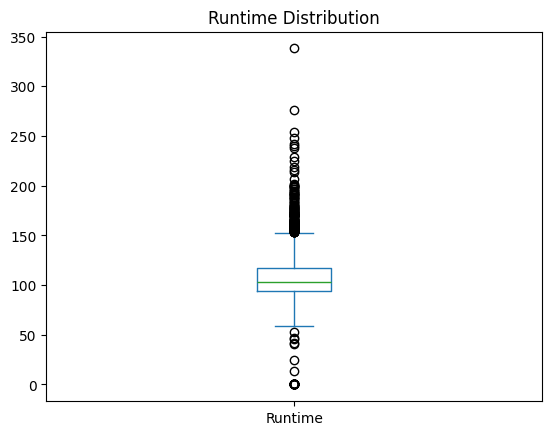

In [45]:
merged_df['Runtime'].plot(kind='box', title='Runtime Distribution')


As we can see there are 35 movies with a missing runtime and 44 movies over 180 minutes. To fix this, we will replace the missing runtimes with the median and we will flag the movies with a runtime over 180 minutes.

In [46]:
# Calculate median runtime (excluding zeros and NaNs)
median_runtime = merged_df.loc[merged_df['Runtime'] > 0, 'Runtime'].median()

# Replace runtimes of 0 with median
merged_df.loc[merged_df['Runtime'] == 0, 'Runtime'] = median_runtime
print(f"Replaced runtimes of 0 with median value: {median_runtime:.1f} minutes")

# Add a runtime flag column
merged_df['Runtime_Flag'] = np.select(
    [
        merged_df['Runtime'] == median_runtime,  
        merged_df['Runtime'] > 240               
    ],
    [
        'Imputed (was 0)',
        'Long runtime (>240m)'
    ],
    default='Normal'
)


merged_df['Runtime_Flag'] = pd.Categorical(
    merged_df['Runtime_Flag'],
    categories=['Normal', 'Imputed (was 0)', 'Long runtime (>240m)'],
    ordered=False
)


print("\nRuntime flag counts:")
print(merged_df['Runtime_Flag'].value_counts())

Replaced runtimes of 0 with median value: 104.0 minutes

Runtime flag counts:
Runtime_Flag
Normal                  4654
Imputed (was 0)          144
Long runtime (>240m)       5
Name: count, dtype: int64


In [47]:
merged_df.head()

,Budget,Genres,Homepage,Id,Keywords,Original_language,Original_title,Overview,Popularity,Production_companies,...,Title_x,Vote_average,Vote_count,Has_release_date,Release_year,Cast,Crew,Profit,Missing_Status,Runtime_Flag
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Avatar,7.2,11800,True,2009,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2550965087,Complete,Normal
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Pirates of the Caribbean: At World's End,6.9,4500,True,2007,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",661000000,Complete,Normal
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Spectre,6.3,4466,True,2015,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",635674609,Complete,Normal
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,The Dark Knight Rises,7.6,9106,True,2012,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",834939099,Complete,Normal
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,John Carter,6.1,2124,True,2012,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",24139100,Complete,Normal


We will now check if vote averages are between 0-10:

In [48]:
# Check for votes outside 0–10 range
invalid_votes = merged_df[(merged_df['Vote_average'] < 0) | (merged_df['Vote_average'] > 10)]

if invalid_votes.empty:
    print("✅ All Vote_Average values are within the valid 0–10 range.")
else:
    print(f"⚠️ Found {len(invalid_votes)} movies with invalid Vote_Average values.")
    display(invalid_votes[['Title_x', 'Vote_average']].head())


✅ All Vote_Average values are within the valid 0–10 range.


I will also check for vote averages that are 0: 

In [49]:
zero_votes = merged_df[merged_df['Vote_average'] == 0]
print(f"⚠️ Found {len(zero_votes)} movies with Vote_Average = 0.")

⚠️ Found 63 movies with Vote_Average = 0.


We will not drop these because there is still useful information. We may decide to impute the missing values with mean/median in the future.

In [50]:
merged_df.to_csv("data/RAW/merged_df.csv", index=False)

---

# Feature Engineering - Additional Derived Features

We will now add additional features that will be useful for machine learning and visualisations:

In [51]:
# =============================================================================
# Binary Flags for Text Field Presence
# =============================================================================

# Create binary flags for whether text fields have meaningful content
for c in ["Homepage", "Overview", "Tagline"]:
    if c in merged_df.columns:
        merged_df[f"Has_{c.lower()}"] = (
            ~merged_df[c].isna() & 
            (merged_df[c].astype("string").str.len() > 0)
        ).astype("Int64")

print("Binary flags created:")
for c in ["Has_homepage", "Has_overview", "Has_tagline"]:
    if c in merged_df.columns:
        print(f"  {c}: {merged_df[c].sum()} movies have this field")


Binary flags created:
  Has_homepage: 1712 movies have this field
  Has_overview: 4800 movies have this field
  Has_tagline: 3959 movies have this field


In [52]:
# =============================================================================
# ROI (Return on Investment)
# =============================================================================

# Calculate ROI as revenue / budget (only for complete budget data)
merged_df["ROI"] = np.where(
    merged_df["Budget"] > 0, 
    merged_df["Revenue"] / merged_df["Budget"], 
    np.nan
)

print(f"ROI calculated for {merged_df['ROI'].notna().sum()} movies")
print(f"Average ROI: {merged_df['ROI'].mean():.2f}x")
print(f"Median ROI: {merged_df['ROI'].median():.2f}x")


ROI calculated for 3766 movies
Average ROI: 2533.49x
Median ROI: 1.87x


In [53]:
# =============================================================================
# Log Transformations for Skewed Monetary Fields
# =============================================================================

# Log transformations help normalise skewed distributions for ML models and visualisations
merged_df["Log_budget"] = np.log1p(merged_df["Budget"].astype("Float64"))
merged_df["Log_revenue"] = np.log1p(merged_df["Revenue"].astype("Float64"))

print("Log transformations created for Budget and Revenue")
print(f"  Log_budget range: {merged_df['Log_budget'].min():.2f} to {merged_df['Log_budget'].max():.2f}")
print(f"  Log_revenue range: {merged_df['Log_revenue'].min():.2f} to {merged_df['Log_revenue'].max():.2f}")


Log transformations created for Budget and Revenue
  Log_budget range: 0.00 to 19.76
  Log_revenue range: 0.00 to 21.75


In [54]:
# =============================================================================
# Decade Grouping
# =============================================================================

# Group movies by decade for trend analysis
merged_df["Decade"] = (merged_df["Release_year"] // 10) * 10

# Set decade to NA for movies with invalid/placeholder release dates
merged_df.loc[merged_df["Has_release_date"] == False, "Decade"] = pd.NA
merged_df["Decade"] = merged_df["Decade"].astype("Int64")

print("Decade column created")
print(f"\nMovies by decade:")
print(merged_df["Decade"].value_counts().sort_index())

Decade column created

Movies by decade:
Decade
1910       1
1920       4
1930      15
1940      25
1950      27
1960      71
1970     109
1980     278
1990     778
2000    2048
2010    1446
Name: count, dtype: Int64


In [55]:
# =============================================================================
# Runtime Buckets (Categorical)
# =============================================================================

# Create categorical runtime buckets for easier analysis and visualization
merged_df["Runtime_bucket"] = pd.cut(
    merged_df["Runtime"],
    bins=[0, 80, 100, 120, 150, np.inf],
    labels=["short", "medium", "long", "very_long", "epic"],
    include_lowest=True
).astype("category")

print("Runtime buckets created:")
print(merged_df["Runtime_bucket"].value_counts().sort_index())

Runtime buckets created:
Runtime_bucket
short         118
medium       1936
long         1761
very_long     817
epic          171
Name: count, dtype: int64


In [56]:
# =============================================================================
# Language Labels - Full Language Names from ISO Codes
# =============================================================================

# Mapping of ISO 639-1 language codes to full language names
language_map = {
    'en': 'English', 'fr': 'French', 'es': 'Spanish', 'zh': 'Chinese', 'de': 'German',
    'hi': 'Hindi', 'ja': 'Japanese', 'it': 'Italian', 'cn': 'Chinese', 'ru': 'Russian',
    'ko': 'Korean', 'pt': 'Portuguese', 'da': 'Danish', 'sv': 'Swedish', 'nl': 'Dutch',
    'fa': 'Persian', 'th': 'Thai', 'he': 'Hebrew', 'ta': 'Tamil', 'cs': 'Czech',
    'ro': 'Romanian', 'id': 'Indonesian', 'ar': 'Arabic', 'vi': 'Vietnamese', 'sl': 'Slovenian',
    'ps': 'Pashto', 'no': 'Norwegian', 'ky': 'Kyrgyz', 'hu': 'Hungarian', 'pl': 'Polish',
    'af': 'Afrikaans', 'nb': 'Norwegian Bokmål', 'tr': 'Turkish', 'is': 'Icelandic',
    'xx': 'Unknown', 'te': 'Telugu', 'el': 'Greek', 'ka': 'Georgian', 'uk': 'Ukrainian',
    'sk': 'Slovak', 'fi': 'Finnish', 'bg': 'Bulgarian', 'sr': 'Serbian', 'lt': 'Lithuanian',
    'lv': 'Latvian', 'et': 'Estonian', 'sq': 'Albanian', 'hr': 'Croatian', 'mk': 'Macedonian',
    'ml': 'Malayalam', 'kn': 'Kannada', 'mr': 'Marathi', 'bn': 'Bengali', 'pa': 'Punjabi'
}

# Create Language_full column from Original_language
merged_df['Language_full'] = merged_df['Original_language'].map(language_map)

# For unmapped languages, keep the original code
merged_df['Language_full'] = merged_df['Language_full'].fillna(merged_df['Original_language'])

print("Language labels created:")
print(f"  Total languages: {merged_df['Language_full'].nunique()}")
print(f"  Top 10 languages:")
print(merged_df['Language_full'].value_counts().head(10))
print(f"\n  Missing language labels: {merged_df['Language_full'].isna().sum()}")

#

Language labels created:
  Total languages: 36
  Top 10 languages:
Language_full
English     4505
French        70
Chinese       39
Spanish       32
German        27
Hindi         19
Japanese      16
Italian       14
Korean        11
Russian       11
Name: count, dtype: int64

  Missing language labels: 0


In [ ]:
# =============================================================================
# Genre Labels - Extract Primary Genre from JSON Structure
# Encode/normalise any values
# Parse JSON strings to extract primary genre, country, and company labels
# Additional JSON columns (keywords, spoken_languages, cast, crew) could be parsed 
# for future use if needed
# =============================================================================

import json
import ast

def extract_primary_genre(genres_str):
    """
    Extract the first genre name from JSON-like genre string.
    Returns 'Unknown' if parsing fails or no genres exist.
    """
    if pd.isna(genres_str) or genres_str == '':
        return 'Unknown'
    
    try:
        # Try parsing as JSON first
        genres_list = json.loads(genres_str.replace("'", '"'))
        if genres_list and len(genres_list) > 0:
            return genres_list[0].get('name', 'Unknown')
        return 'Unknown'
    except:
        try:
            # If JSON parsing fails, try using ast.literal_eval
            genres_list = ast.literal_eval(genres_str)
            if genres_list and len(genres_list) > 0:
                return genres_list[0].get('name', 'Unknown')
            return 'Unknown'
        except:
            return 'Unknown'
# Create Primary_genre column
merged_df['Primary_genre'] = merged_df['Genres'].apply(extract_primary_genre)

print("Primary genre labels created:")
print(f"  Total unique genres: {merged_df['Primary_genre'].nunique()}")
print(f"  Top 10 genres:")
print(merged_df['Primary_genre'].value_counts().head(10))
print(f"\n  Unknown genres: {(merged_df['Primary_genre'] == 'Unknown').sum()}")

Primary genre labels created:
  Total unique genres: 21
  Top 10 genres:
Primary_genre
Drama        1207
Comedy       1042
Action        754
Adventure     339
Horror        300
Crime         195
Thriller      194
Animation     123
Fantasy       117
Romance       106
Name: count, dtype: int64

  Unknown genres: 28


In [58]:
# =============================================================================
# Production Country Labels - Extract Primary Production Country
# =============================================================================

def extract_primary_production_country(countries_str):
    """
    Extract the first production country name from JSON-like structure.
    Returns 'Unknown' if parsing fails or no countries exist.
    """
    if pd.isna(countries_str) or countries_str == '':
        return 'Unknown'
    
    try:
        # Try parsing as JSON first
        countries_list = json.loads(countries_str.replace("'", '"'))
        if countries_list and len(countries_list) > 0:
            return countries_list[0].get('name', 'Unknown')
        return 'Unknown'
    except:
        try:
            # If JSON parsing fails, try using ast.literal_eval
            countries_list = ast.literal_eval(countries_str)
            if countries_list and len(countries_list) > 0:
                return countries_list[0].get('name', 'Unknown')
            return 'Unknown'
        except:
            return 'Unknown'

# Create Primary_production_country column
merged_df['Primary_production_country'] = merged_df['Production_countries'].apply(extract_primary_production_country)

print("\nProduction country labels created:")
print(f"  Total unique countries: {merged_df['Primary_production_country'].nunique()}")
print(f"  Top 10 countries:")
print(merged_df['Primary_production_country'].value_counts().head(10))
print(f"\n  Unknown countries: {(merged_df['Primary_production_country'] == 'Unknown').sum()}")

# =============================================================================
# Production Company Labels - Extract Primary Production Company
# =============================================================================

def extract_primary_production_company(companies_str):
    """
    Extract the first production company name from JSON-like structure.
    Returns 'Unknown' if parsing fails or no companies exist.
    """
    if pd.isna(companies_str) or companies_str == '':
        return 'Unknown'
    
    try:
        # Try parsing as JSON first
        companies_list = json.loads(companies_str.replace("'", '"'))
        if companies_list and len(companies_list) > 0:
            return companies_list[0].get('name', 'Unknown')
        return 'Unknown'
    except:
        try:
            # If JSON parsing fails, try using ast.literal_eval
            companies_list = ast.literal_eval(companies_str)
            if companies_list and len(companies_list) > 0:
                return companies_list[0].get('name', 'Unknown')
            return 'Unknown'
        except:
            return 'Unknown'

# Create Primary_production_company column
merged_df['Primary_production_company'] = merged_df['Production_companies'].apply(extract_primary_production_company)

print("\nProduction company labels created:")
print(f"  Total unique companies: {merged_df['Primary_production_company'].nunique()}")
print(f"  Top 10 companies:")
print(merged_df['Primary_production_company'].value_counts().head(10))
print(f"\n  Unknown companies: {(merged_df['Primary_production_company'] == 'Unknown').sum()}")


Production country labels created:
  Total unique countries: 71
  Top 10 countries:
Primary_production_country
United States of America    3102
United Kingdom               374
Canada                       220
Germany                      200
France                       174
Unknown                      174
Australia                     87
India                         42
China                         40
Japan                         34
Name: count, dtype: int64

  Unknown countries: 174

Production company labels created:
  Total unique companies: 1314
  Top 10 companies:
Primary_production_company
Unknown                                   351
Paramount Pictures                        281
Universal Pictures                        260
Columbia Pictures                         200
Twentieth Century Fox Film Corporation    177
New Line Cinema                           157
Walt Disney Pictures                      114
Miramax Films                              87
United Artists          

# Summary of all new engineered features:

In [59]:
# =============================================================================
# Final Validation of Engineered Features 
# =============================================================================

print("=" * 60)
print("ENGINEERED FEATURES SUMMARY")
print("=" * 60)

new_features = [
    "Has_homepage", "Has_overview", "Has_tagline",
    "ROI", "Log_budget", "Log_revenue",
    "Decade", "Runtime_bucket", "Language_full", "Primary_genre",
    "Primary_production_country", "Primary_production_company"
]

for feature in new_features:
    if feature in merged_df.columns:
        missing = merged_df[feature].isna().sum()
        pct_missing = (missing / len(merged_df)) * 100
        print(f"{feature:20s} | dtype: {str(merged_df[feature].dtype):15s} | missing: {missing:4d} ({pct_missing:5.2f}%)")

print("=" * 60)
print(f"\nTotal columns: {len(merged_df.columns)}")
print(f"Total rows: {len(merged_df):,}")

ENGINEERED FEATURES SUMMARY
Has_homepage         | dtype: Int64           | missing:    0 ( 0.00%)
Has_overview         | dtype: Int64           | missing:    0 ( 0.00%)
Has_tagline          | dtype: Int64           | missing:    0 ( 0.00%)
ROI                  | dtype: float64         | missing: 1037 (21.59%)
Log_budget           | dtype: Float64         | missing:    0 ( 0.00%)
Log_revenue          | dtype: Float64         | missing:    0 ( 0.00%)
Decade               | dtype: Int64           | missing:    1 ( 0.02%)
Runtime_bucket       | dtype: category        | missing:    0 ( 0.00%)
Language_full        | dtype: object          | missing:    0 ( 0.00%)
Primary_genre        | dtype: object          | missing:    0 ( 0.00%)
Primary_production_country | dtype: object          | missing:    0 ( 0.00%)
Primary_production_company | dtype: object          | missing:    0 ( 0.00%)

Total columns: 39
Total rows: 4,803


# Print Processed File

In [60]:
# =============================================================================
# Save Processed Dataset
# =============================================================================

# Save to new processed file for EDA
merged_df.to_csv("Data/PROCESSED/movies_ready_for_EDA.csv", index=False)
print("\n File saved: Data/PROCESSED/movies_ready_for_EDA.csv")
print(f"   Total columns: {len(merged_df.columns)}")
print(f"   Total rows: {len(merged_df):,}")


 File saved: Data/PROCESSED/movies_ready_for_EDA.csv
   Total columns: 39
   Total rows: 4,803


---

# Conclusions and Next Steps:

## Conclusions:

- Loaded TMDb datasets
- Basic EDA
- Filled missing values
- Converted data to correct types
- Checked and handled duplicates
- Merged datasets
- Added columns
- Removed columns
- Flagged data with issues
- Saved the merged dataset into "RAW" folder
- Created Engineered features:
    - Has_homepage 
    - Has_overview  
    - Has_tagline      
    - ROI               
    - Log_budget        
    - Log_revenue        
    - Decade            
    - Runtime_bucket  
    - Language_full     
    - Primary_genre    
    - Primary_production_country 
    - Primary_production_company 
- Processed file into "PROCESSED" folder :
    movies_ready_for_EDA

## Next Steps:

- Load merged data into Feature engineering notebook
- Encode/normalise any values
- Possibly parse other JSON strings for future use 